
 * This code for model training has been written by:
 * Name: Lungu David
 * Student ID: 18122108
 * Title: Presence of Fall Armyworms Detection System
 * Contact Details: (+260) 976-813-878, 964-878-078
 *
 * The project was speer headed and supervised by: Mr Mathews Chibuluma (Assistant Dean SICT)
 *
 *
 * The code is protected and code is licensed under the terms of The Copperbelt University
 * The model is trained to acts as the prediction of the presence of fall army-worms on Maize fields
 * using Image Classification
 * This code can also be used to train models to classify other types of animals

In [61]:

# TensorFlow and tf.keras
import tensorflow as tf
import cv2
import numpy as np
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


In [62]:
# defining the image size and the number of epochs

IMG_SIZE = 224
EPOCHS_NUMBER = 35

In [63]:
# defining an array of the class names

class_names = ["DefectLeaf", "HealthLeaf","DefectPlant","HealthPlant"]

In [64]:
# path to the training and testing data sets
# storing the images in the variables from the path

DATADIR_TEST = "Images/Testing_Dataset"
DATADIR = "Images/Training_Dataset"
class_names = ["DefectLeaf", "HealthLeaf","DefectPlant","HealthPlant"]

In [65]:
# loading the datasets into an array
# loading by category according to the class the images belong to into class_names

training_data = [] # declaring an array to store the training_dataset

# defining the method that loads the imgs and changes them to grey scale 
def create_training_data():
    for category in class_names:
        path = os.path.join(DATADIR, category)
        class_num = class_names.index(category)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                print(e)
                pass

In [66]:
# same done also for the testing_dataset as in the training dataset above.
testing_data = []
def create_testing_data():
    for category in class_names:
        path = os.path.join(DATADIR_TEST,category)
        class_num = class_names.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                testing_data.append([new_array, class_num])
            except Exception as e:
                print(e)
                pass

In [67]:
# calling the defined methods for train and testing datasets

create_training_data()
create_testing_data()

In [68]:
# creating labels for the datasets to label our dataset images

train_images=[]
train_labels=[]
test_images=[]
test_labels=[]

Dividing the loaded data into labels by assigning labels to each image.
Done for both Training_Dataset and Testing_Dataset.

In [69]:
for features,label in training_data:
    train_images.append(features)
    train_labels.append(label)
    
train_images = np.array(train_images).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [70]:
for features,label in testing_data:
    test_images.append(features)
    test_labels.append(label)
    
test_images = np.array(test_images).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [71]:
# verifying the shape of the images
train_images.shape

(2290, 500, 500, 1)

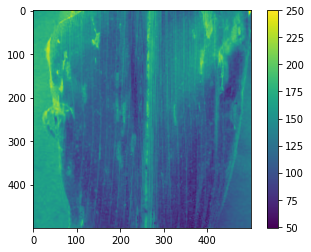

In [73]:
#checking the image from the train array
plt.figure()
plt.imshow(train_images[4])
plt.colorbar()
plt.grid(False)
plt.show()

In [74]:
# resizing training dataset and testing dataset images
train_images = train_images / 255

test_images = test_images / 255

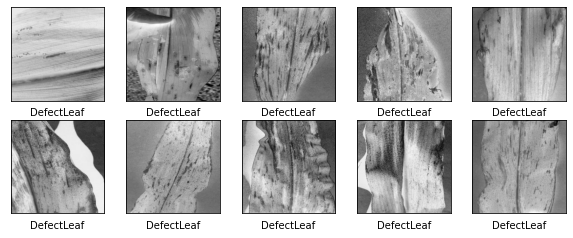

In [75]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Creating and Compiling the Model Object

In [76]:
# creating a model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_SIZE, IMG_SIZE)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [77]:
# converting a list arrays into a numpy arrays
train_images = np.array(train_images)
test_images = np.array(test_images)
train_labels= np.array(train_labels)
test_labels = np.array(test_labels)

In [78]:
# compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training the Model

In [ ]:
model.fit(train_images, train_labels, epochs= EPOCHS_NUMBER)

Evaluating the average accuracy of the model using the test dataset

In [ ]:
# evaluating the average training accuracy of the model using the test dataset 
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Generating a Trained Model

In [81]:
# creating a probability_model trained model
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
import os.path
from tensorflow import lite

# as the .h5 file_extension
# if os.is_file('Mode1s/kerastf_trainedmod.h5') is False:
model.save('Mode1s/kerastf_trainedmod.h5')

# as a tflite file_extension
converter = lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
open('fawds_saved_model.tflite', 'wb').write(tfmodel)


Making Predication Tests Using an Image from the Test Dataset

In [ ]:
# loading the test_images in the model prediction function
predictions = probability_model.predict(test_images)

In [84]:
np.argmax(predictions[0])

1

In [85]:
# defining a function that assigns colors to the predictions
# assigns green to the predictions that are healthy(both plants and leaves)
# assigns red to the predictions that are defected(both plants and leaves)
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

# setting the colors for the predictions to the prediction labels.
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

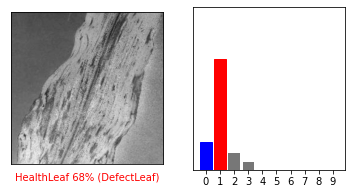

In [86]:
i = 44
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Testing the Predication using a single image from the test dataset

(500, 500, 1)


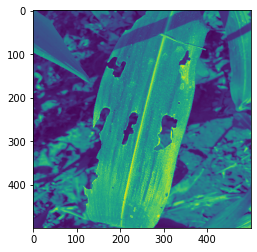

In [87]:
img = test_images[100]
# img = 'Validation/20220720_104210.jpg'
# img = img.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# showing the selected image from the test dataset
print(img.shape)
plt.imshow(img)

In [88]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 500, 500, 1)


In [89]:
# predicting the selected image using the trained model
predictions_single = probability_model.predict(img)

# print(predictions_single)

1/1 [==============================] - 0s 67ms/step


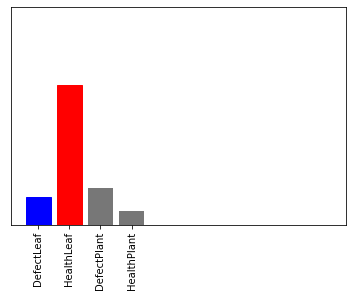

In [90]:
# graphing the prediction results for the image shown above

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(4), class_names, rotation=90)
plt.show()

End of Code